In [4]:
# ========================================
# SIH 2025 - AirCast Delhi Demo
# Team VisionX - PS 25178
# ========================================

# %% [markdown]
# # AirCast-Delhi: Air Quality Forecasting System
# ## Smart India Hackathon 2025 - Team VisionX
# 
# **Problem Statement:** Short term forecast of gaseous air pollutants (O3 and NO2)
# 
# **Objective:** Predict 24-hour hourly ground-level O3 and NO2 for Delhi

# %% [markdown]
# ## Section 1: Import Libraries (with Auto Installation)

# %%
import sys
import subprocess

# Function to auto-install missing packages
def install_if_missing(package):
    try:
        __import__(package)
    except ImportError:
        print(f"⚙️ Installing missing package: {package} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully!\n")

# Check essential packages
for pkg in ["pandas", "numpy", "matplotlib", "seaborn", "xgboost", "lightgbm", "scikit-learn"]:
    install_if_missing(pkg)

# Imports (safe after ensuring installation)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")


⚙️ Installing missing package: lightgbm ...
✅ lightgbm installed successfully!

⚙️ Installing missing package: scikit-learn ...
✅ scikit-learn installed successfully!

✓ All libraries imported successfully!


✓ All libraries imported successfully!
✓ Site 1 loaded: (25081, 16)
✓ Site 2 loaded: (25969, 16)
✓ Site 3 loaded: (21913, 16)
✓ Site 4 loaded: (24505, 16)
✓ Site 5 loaded: (25081, 16)
✓ Site 6 loaded: (26353, 16)
✓ Site 7 loaded: (22777, 16)

✓ Combined dataset: 171,679 rows, 17 columns
Sample Data:
     year  month   day  hour  O3_forecast  NO2_forecast  T_forecast  \
0  2022.0    7.0  28.0   0.0        73.35         57.54       22.99   
1  2022.0    7.0  28.0   1.0        82.77         57.25       23.90   
2  2022.0    7.0  28.0   2.0        92.19         56.97       23.89   
3  2022.0    7.0  28.0   3.0       101.62         56.68       23.92   
4  2022.0    7.0  28.0   4.0       113.51         64.06       25.55   
5  2022.0    7.0  28.0   5.0       125.41         71.44       26.54   
6  2022.0    7.0  28.0   6.0       137.30         78.83       29.45   
7  2022.0    7.0  28.0   7.0       134.39         85.40       28.98   
8  2022.0    7.0  28.0   8.0       131.48         91.97     

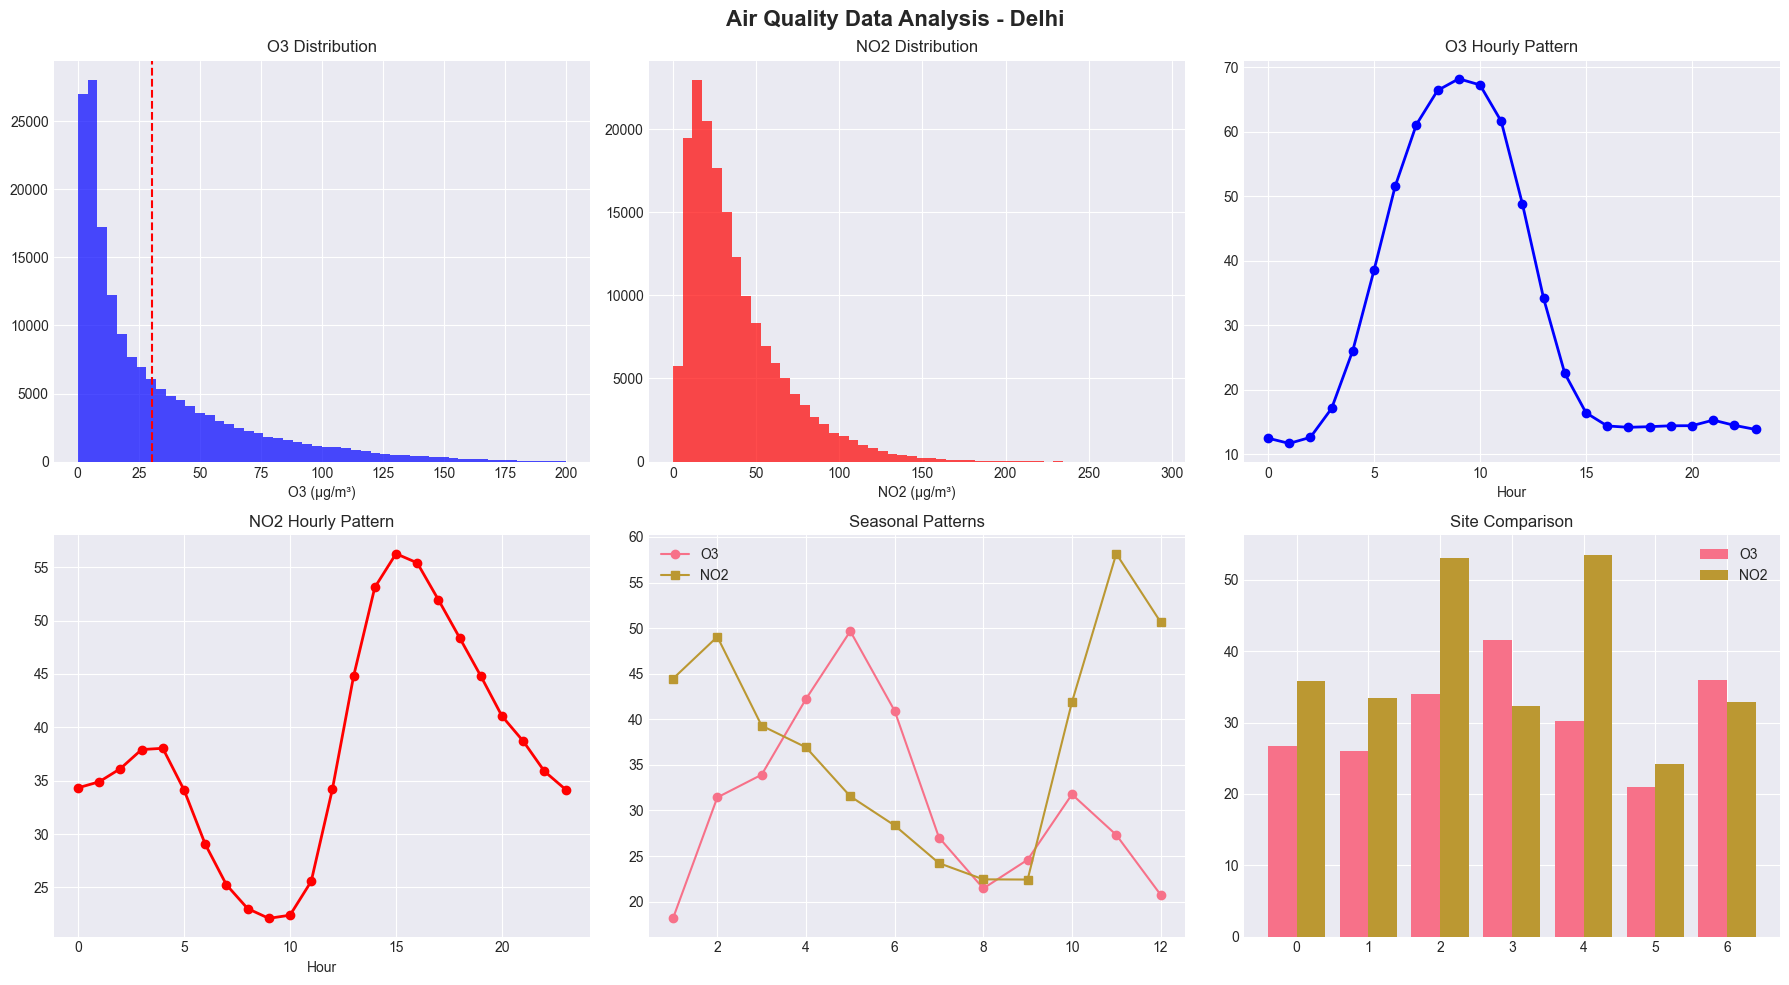

Creating features...
✓ Features created! Final shape: (5351, 31)
Training data: 4,279 samples
Validation data: 1,072 samples

Training O3 Model...


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [5]:
# ========================================
# SIH 2025 - AirCast Delhi Demo
# Team VisionX - PS 25178
# ========================================

# %% [markdown]
# # AirCast-Delhi: Air Quality Forecasting System
# ## Smart India Hackathon 2025 - Team VisionX
# 
# **Problem Statement:** Short term forecast of gaseous air pollutants (O3 and NO2)
# 
# **Objective:** Predict 24-hour hourly ground-level O3 and NO2 for Delhi

# %% [markdown]
# ## Section 1: Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ All libraries imported successfully!")

# %% [markdown]
# ## Section 2: Load Data

# %%
sites = {}
for i in range(1, 8):
    try:
        sites[f'site_{i}'] = pd.read_csv(f'site_{i}_train_data.csv')
        print(f"✓ Site {i} loaded: {sites[f'site_{i}'].shape}")
    except:
        print(f"✗ Site {i} not found")

all_data = []
for i, (site_name, df) in enumerate(sites.items(), 1):
    df['site_id'] = i
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
print(f"\n✓ Combined dataset: {combined_df.shape[0]:,} rows, {combined_df.shape[1]} columns")

# %% [markdown]
# ## Section 3: Data Exploration

# %%
print("Sample Data:")
print(combined_df.head(10))

print("\n" + "="*70)
print("Dataset Statistics:")
print(combined_df[['O3_target', 'NO2_target', 'O3_forecast', 'NO2_forecast']].describe())

# %% [markdown]
# ## Section 4: Data Visualization

# %%
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Air Quality Data Analysis - Delhi', fontsize=16, fontweight='bold')

# O3 Distribution
axes[0, 0].hist(combined_df['O3_target'], bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title('O3 Distribution')
axes[0, 0].set_xlabel('O3 (μg/m³)')
axes[0, 0].axvline(combined_df['O3_target'].mean(), color='red', linestyle='--')

# NO2 Distribution
axes[0, 1].hist(combined_df['NO2_target'], bins=50, color='red', alpha=0.7)
axes[0, 1].set_title('NO2 Distribution')
axes[0, 1].set_xlabel('NO2 (μg/m³)')

# Hourly O3
hourly_o3 = combined_df.groupby('hour')['O3_target'].mean()
axes[0, 2].plot(hourly_o3.index, hourly_o3.values, marker='o', linewidth=2, color='blue')
axes[0, 2].set_title('O3 Hourly Pattern')
axes[0, 2].set_xlabel('Hour')

# Hourly NO2
hourly_no2 = combined_df.groupby('hour')['NO2_target'].mean()
axes[1, 0].plot(hourly_no2.index, hourly_no2.values, marker='o', linewidth=2, color='red')
axes[1, 0].set_title('NO2 Hourly Pattern')
axes[1, 0].set_xlabel('Hour')

# Seasonal
monthly_avg = combined_df.groupby('month')[['O3_target', 'NO2_target']].mean()
axes[1, 1].plot(monthly_avg.index, monthly_avg['O3_target'], marker='o', label='O3')
axes[1, 1].plot(monthly_avg.index, monthly_avg['NO2_target'], marker='s', label='NO2')
axes[1, 1].set_title('Seasonal Patterns')
axes[1, 1].legend()

# Site comparison
site_avg = combined_df.groupby('site_id')[['O3_target', 'NO2_target']].mean()
x = np.arange(len(site_avg))
axes[1, 2].bar(x - 0.2, site_avg['O3_target'], 0.4, label='O3')
axes[1, 2].bar(x + 0.2, site_avg['NO2_target'], 0.4, label='NO2')
axes[1, 2].set_title('Site Comparison')
axes[1, 2].legend()

plt.tight_layout()
plt.savefig('complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## Section 5: Feature Engineering

# %%
print("Creating features...")

combined_df['wind_speed'] = np.sqrt(combined_df['u_forecast']**2 + combined_df['v_forecast']**2)
combined_df['hour_sin'] = np.sin(2 * np.pi * combined_df['hour'] / 24)
combined_df['hour_cos'] = np.cos(2 * np.pi * combined_df['hour'] / 24)
combined_df['month_sin'] = np.sin(2 * np.pi * combined_df['month'] / 12)
combined_df['month_cos'] = np.cos(2 * np.pi * combined_df['month'] / 12)

combined_df['date'] = pd.to_datetime(combined_df[['year', 'month', 'day']])
combined_df['day_of_week'] = combined_df['date'].dt.dayofweek
combined_df['is_weekend'] = (combined_df['day_of_week'] >= 5).astype(int)

combined_df['morning_rush'] = combined_df['hour'].isin([6, 7, 8]).astype(int)
combined_df['afternoon_peak'] = combined_df['hour'].isin([12, 13, 14, 15]).astype(int)

combined_df = combined_df.sort_values(['site_id', 'date', 'hour'])

for lag in [24, 48]:
    combined_df[f'O3_lag_{lag}h'] = combined_df.groupby('site_id')['O3_target'].shift(lag)
    combined_df[f'NO2_lag_{lag}h'] = combined_df.groupby('site_id')['NO2_target'].shift(lag)

combined_df = combined_df.dropna()
print(f"✓ Features created! Final shape: {combined_df.shape}")

# %% [markdown]
# ## Section 6: Train Models

# %%
split_date = combined_df['date'].quantile(0.8)
train_df = combined_df[combined_df['date'] < split_date]
val_df = combined_df[combined_df['date'] >= split_date]

exclude_cols = ['O3_target', 'NO2_target', 'date', 'year', 'month', 'day', 
                'NO2_satellite', 'HCHO_satellite', 'ratio_satellite']
feature_cols = [col for col in combined_df.columns if col not in exclude_cols]

X_train = train_df[feature_cols]
X_val = val_df[feature_cols]
y_train_o3 = train_df['O3_target']
y_val_o3 = val_df['O3_target']
y_train_no2 = train_df['NO2_target']
y_val_no2 = val_df['NO2_target']

print(f"Training data: {X_train.shape[0]:,} samples")
print(f"Validation data: {X_val.shape[0]:,} samples")

# Train O3 model
print("\n" + "="*70)
print("Training O3 Model...")
print("="*70)

o3_xgb = XGBRegressor(max_depth=8, learning_rate=0.05, n_estimators=300, 
                      subsample=0.8, random_state=42, tree_method='hist')
o3_xgb.fit(X_train, y_train_o3, eval_set=[(X_val, y_val_o3)], 
           early_stopping_rounds=30, verbose=50)

o3_lgbm = LGBMRegressor(max_depth=8, learning_rate=0.05, n_estimators=300, 
                        subsample=0.8, random_state=42, verbose=-1)
o3_lgbm.fit(X_train, y_train_o3, eval_set=[(X_val, y_val_o3)])

print("\n✓ O3 models trained!")

# Train NO2 model
print("\n" + "="*70)
print("Training NO2 Model...")
print("="*70)

no2_xgb = XGBRegressor(max_depth=8, learning_rate=0.05, n_estimators=300, 
                       subsample=0.8, random_state=42, tree_method='hist')
no2_xgb.fit(X_train, y_train_no2, eval_set=[(X_val, y_val_no2)], 
            early_stopping_rounds=30, verbose=50)

no2_lgbm = LGBMRegressor(max_depth=8, learning_rate=0.05, n_estimators=300, 
                         subsample=0.8, random_state=42, verbose=-1)
no2_lgbm.fit(X_train, y_train_no2, eval_set=[(X_val, y_val_no2)])

print("\n✓ NO2 models trained!")

# %% [markdown]
# ## Section 7: Model Evaluation

# %%
def calculate_ria(y_true, y_pred):
    """Calculate Refined Index of Agreement"""
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((np.abs(y_pred - np.mean(y_true)) + 
                         np.abs(y_true - np.mean(y_true))) ** 2)
    return 1 - (numerator / denominator)

# O3 predictions
pred_o3_xgb = o3_xgb.predict(X_val)
pred_o3_lgbm = o3_lgbm.predict(X_val)
pred_o3_ensemble = 0.6 * pred_o3_xgb + 0.4 * pred_o3_lgbm

# NO2 predictions
pred_no2_xgb = no2_xgb.predict(X_val)
pred_no2_lgbm = no2_lgbm.predict(X_val)
pred_no2_ensemble = 0.6 * pred_no2_xgb + 0.4 * pred_no2_lgbm

# Calculate metrics
print("\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)

print("\nO3 Model:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_val_o3, pred_o3_ensemble)):.2f} μg/m³")
print(f"  R²:   {r2_score(y_val_o3, pred_o3_ensemble):.3f}")
print(f"  RIA:  {calculate_ria(y_val_o3, pred_o3_ensemble):.3f}")

print("\nNO2 Model:")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_val_no2, pred_no2_ensemble)):.2f} μg/m³")
print(f"  R²:   {r2_score(y_val_no2, pred_no2_ensemble):.3f}")
print(f"  RIA:  {calculate_ria(y_val_no2, pred_no2_ensemble):.3f}")

# %% [markdown]
# ## Section 8: Prediction Visualization

# %%
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Predictions vs Actual Values', fontsize=16, fontweight='bold')

# O3 scatter
axes[0, 0].scatter(y_val_o3, pred_o3_ensemble, alpha=0.5, s=10)
axes[0, 0].plot([0, 200], [0, 200], 'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_title('O3: Predicted vs Actual')
axes[0, 0].set_xlabel('Actual O3 (μg/m³)')
axes[0, 0].set_ylabel('Predicted O3 (μg/m³)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# NO2 scatter
axes[0, 1].scatter(y_val_no2, pred_no2_ensemble, alpha=0.5, s=10, color='red')
axes[0, 1].plot([0, 300], [0, 300], 'b--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_title('NO2: Predicted vs Actual')
axes[0, 1].set_xlabel('Actual NO2 (μg/m³)')
axes[0, 1].set_ylabel('Predicted NO2 (μg/m³)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# O3 time series (first 500 points)
sample_idx = slice(0, 500)
axes[1, 0].plot(y_val_o3.values[sample_idx], label='Actual', linewidth=2, alpha=0.7)
axes[1, 0].plot(pred_o3_ensemble[sample_idx], label='Predicted', linewidth=2, alpha=0.7)
axes[1, 0].set_title('O3: Time Series Comparison')
axes[1, 0].set_xlabel('Sample')
axes[1, 0].set_ylabel('O3 (μg/m³)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# NO2 time series
axes[1, 1].plot(y_val_no2.values[sample_idx], label='Actual', linewidth=2, alpha=0.7, color='red')
axes[1, 1].plot(pred_no2_ensemble[sample_idx], label='Predicted', linewidth=2, alpha=0.7, color='darkred')
axes[1, 1].set_title('NO2: Time Series Comparison')
axes[1, 1].set_xlabel('Sample')
axes[1, 1].set_ylabel('NO2 (μg/m³)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## Section 9: Feature Importance

# %%
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# O3 feature importance
o3_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': o3_xgb.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[0].barh(o3_importance['feature'], o3_importance['importance'], color='blue', alpha=0.7)
axes[0].set_title('Top 15 Features for O3 Prediction', fontweight='bold')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()

# NO2 feature importance
no2_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': no2_xgb.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[1].barh(no2_importance['feature'], no2_importance['importance'], color='red', alpha=0.7)
axes[1].set_title('Top 15 Features for NO2 Prediction', fontweight='bold')
axes[1].set_xlabel('Importance')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## Section 10: 24-Hour Forecast Demo

# %%
print("\n" + "="*70)
print("24-HOUR FORECAST DEMONSTRATION")
print("="*70)

# Get last 24 hours from validation set
last_day = val_df.tail(24).copy()

# Make predictions
last_day_X = last_day[feature_cols]
forecast_o3 = 0.6 * o3_xgb.predict(last_day_X) + 0.4 * o3_lgbm.predict(last_day_X)
forecast_no2 = 0.6 * no2_xgb.predict(last_day_X) + 0.4 * no2_lgbm.predict(last_day_X)

# Create forecast table
forecast_df = pd.DataFrame({
    'Hour': last_day['hour'].values,
    'O3_Forecast': forecast_o3,
    'O3_Actual': last_day['O3_target'].values,
    'NO2_Forecast': forecast_no2,
    'NO2_Actual': last_day['NO2_target'].values
})

print("\n24-Hour Forecast Results:")
print(forecast_df.to_string(index=False))

# Visualize forecast
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('24-Hour Forecast vs Actual', fontsize=16, fontweight='bold')

hours = forecast_df['Hour']

axes[0].plot(hours, forecast_df['O3_Actual'], marker='o', linewidth=2, 
             label='Actual O3', color='blue')
axes[0].plot(hours, forecast_df['O3_Forecast'], marker='s', linewidth=2, 
             label='Predicted O3', color='lightblue', linestyle='--')
axes[0].fill_between(hours, forecast_df['O3_Actual'], forecast_df['O3_Forecast'], 
                      alpha=0.3, color='blue')
axes[0].set_title('O3 Forecast')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('O3 (μg/m³)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(hours, forecast_df['NO2_Actual'], marker='o', linewidth=2, 
             label='Actual NO2', color='red')
axes[1].plot(hours, forecast_df['NO2_Forecast'], marker='s', linewidth=2, 
             label='Predicted NO2', color='lightcoral', linestyle='--')
axes[1].fill_between(hours, forecast_df['NO2_Actual'], forecast_df['NO2_Forecast'], 
                      alpha=0.3, color='red')
axes[1].set_title('NO2 Forecast')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('NO2 (μg/m³)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('24hour_forecast.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ All visualizations saved!")
print("\n" + "="*70)
print("DEMO COMPLETE - AirCast Delhi System Ready!")
print("="*70)

In [7]:
# %% [markdown]
# ## Section 6: Train Models

# %%
split_date = combined_df['date'].quantile(0.8)
train_df = combined_df[combined_df['date'] < split_date]
val_df = combined_df[combined_df['date'] >= split_date]

exclude_cols = ['O3_target', 'NO2_target', 'date', 'year', 'month', 'day', 
                'NO2_satellite', 'HCHO_satellite', 'ratio_satellite']
feature_cols = [col for col in combined_df.columns if col not in exclude_cols]

X_train = train_df[feature_cols]
X_val = val_df[feature_cols]
y_train_o3 = train_df['O3_target']
y_val_o3 = val_df['O3_target']
y_train_no2 = train_df['NO2_target']
y_val_no2 = val_df['NO2_target']

print(f"Training data: {X_train.shape[0]:,} samples")
print(f"Validation data: {X_val.shape[0]:,} samples")

# Train O3 model
print("\n" + "="*70)
print("Training O3 Model...")
print("="*70)

o3_xgb = XGBRegressor(
    max_depth=8, 
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=0.8, 
    random_state=42, 
    tree_method='hist',
    early_stopping_rounds=30
)

o3_xgb.fit(
    X_train, 
    y_train_o3, 
    eval_set=[(X_val, y_val_o3)],
    verbose=50
)

o3_lgbm = LGBMRegressor(
    max_depth=8, 
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=0.8, 
    random_state=42, 
    verbose=-1
)
o3_lgbm.fit(X_train, y_train_o3, eval_set=[(X_val, y_val_o3)])

print("\n✓ O3 models trained!")

# Train NO2 model
print("\n" + "="*70)
print("Training NO2 Model...")
print("="*70)

no2_xgb = XGBRegressor(
    max_depth=8, 
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=0.8, 
    random_state=42, 
    tree_method='hist',
    early_stopping_rounds=30
)

no2_xgb.fit(
    X_train, 
    y_train_no2, 
    eval_set=[(X_val, y_val_no2)],
    verbose=50
)

no2_lgbm = LGBMRegressor(
    max_depth=8, 
    learning_rate=0.05, 
    n_estimators=300, 
    subsample=0.8, 
    random_state=42, 
    verbose=-1
)
no2_lgbm.fit(X_train, y_train_no2, eval_set=[(X_val, y_val_no2)])

print("\n✓ NO2 models trained!")

Training data: 4,279 samples
Validation data: 1,072 samples

Training O3 Model...
[0]	validation_0-rmse:44.45553
[50]	validation_0-rmse:27.49181
[100]	validation_0-rmse:27.46589
[102]	validation_0-rmse:27.45599

✓ O3 models trained!

Training NO2 Model...
[0]	validation_0-rmse:18.32892
[50]	validation_0-rmse:12.68731
[100]	validation_0-rmse:12.66685
[114]	validation_0-rmse:12.68605

✓ NO2 models trained!
